In [1]:
# مكتبة التعامل مع بيئات الأتاري
!pip install ale_py
# مكتبة التعلم المُعزز
!pip install stable_baselines3
# تحديث مكتبة الأفلام
!pip install --upgrade moviepy

In [2]:
# استيراد مكتبة التعامل مع الألعاب
import ale_py

In [3]:
# دالة إنشاء بيئة أتاري
from stable_baselines3.common.env_util import make_atari_env

In [4]:
# معرف البيئة
env_id= 'ALE/Riverraid-v5'
# بيئات أخرى
#ALE/Riverraid-v5  ALE/Pong-v5  ALE/MsPacman-v5 ALE/Breakout-v5 ALE/MarioBros-v5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# إنشاء البيئة
env = make_atari_env(env_id, n_envs=1, seed=0)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [110, 156,  66],
        [110, 156,  66],
        [110, 156,  66]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
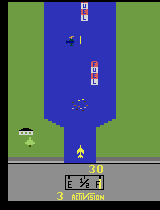

In [6]:
# إعادة التهيئة
obs = env.reset()
# الإظهار
env.render()

In [19]:
# عدد حلقات التجريب
episodes = 32
# قائمة لحفظ صور البيئة المتعاقبة
frames = []
# قائمة لمكافآت كل حلقة
reward_history_before = []
# متغير لمكافآت كل الحلقات
episodes_total_reward=0

In [20]:
for episode in range(episodes):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = env.action_space.sample()
        action=[action]
        obs, reward, done, infos = env.step(action)
        total_reward += reward[0]
        frames.append(env.render())
    episodes_total_reward+=total_reward
    reward_history_before.append(total_reward)
    print(f"Before Training - Episode {episode + 1} - Total Reward: {total_reward}")
print(f"No training Mean reward: {round(episodes_total_reward/episodes,2)}")

Before Training - Episode 1 - Total Reward: 2.0
Before Training - Episode 2 - Total Reward: 0.0
Before Training - Episode 3 - Total Reward: 1.0
Before Training - Episode 4 - Total Reward: 1.0
Before Training - Episode 5 - Total Reward: 0.0
Before Training - Episode 6 - Total Reward: 2.0
Before Training - Episode 7 - Total Reward: 1.0
Before Training - Episode 8 - Total Reward: 1.0
Before Training - Episode 9 - Total Reward: 3.0
Before Training - Episode 10 - Total Reward: 1.0
Before Training - Episode 11 - Total Reward: 1.0
Before Training - Episode 12 - Total Reward: 1.0
Before Training - Episode 13 - Total Reward: 1.0
Before Training - Episode 14 - Total Reward: 1.0
Before Training - Episode 15 - Total Reward: 2.0
Before Training - Episode 16 - Total Reward: 2.0
Before Training - Episode 17 - Total Reward: 2.0
Before Training - Episode 18 - Total Reward: 0.0
Before Training - Episode 19 - Total Reward: 1.0
Before Training - Episode 20 - Total Reward: 0.0
Before Training - Episode 21 

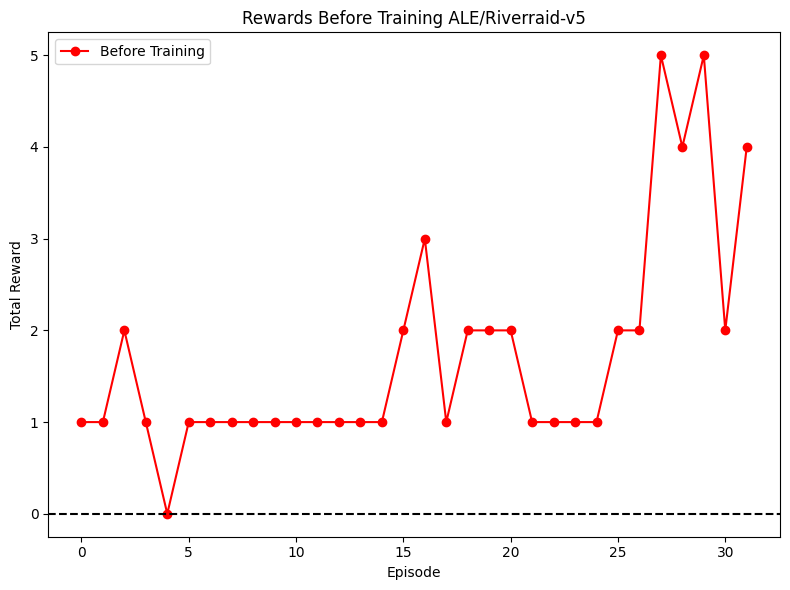

In [9]:
# رسم المكافآت
# مكتبة الرسم
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(reward_history_before, label="Before Training", color="red", linestyle="-", marker="o")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"Rewards Before Training {env_id}")
plt.axhline(y=0, color="black", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# دالة إنشاء فيديو
from moviepy import ImageSequenceClip

In [11]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [12]:
# مسار مجلد الفيديو
clip_folder='/content/drive/MyDrive/AtraiVideos/'
# اسم البيئة
id=env_id.split('/')[-1]
# اسم ملف الفيديو
clip_file_name=f"random_{id}.mp4"
# مسار ملف الفيديو
clip_file_path = clip_folder + clip_file_name

In [13]:
print("Creating video, please wait...")
# إنشاء الفيديو
clip = ImageSequenceClip(frames, fps=10)
# حفظ الفيديو
clip.write_videofile(clip_file_path)
# إغلاق البيئة
env.close()

print(f"Video saved as {clip_file_name}")

Creating video, please wait...
MoviePy - Building video /content/drive/MyDrive/AtraiVideos/random_Riverraid-v5.mp4.
MoviePy - Writing video /content/drive/MyDrive/AtraiVideos/random_Riverraid-v5.mp4



MoviePy - Done !
MoviePy - video ready /content/drive/MyDrive/AtraiVideos/random_Riverraid-v5.mp4
Video saved as random_Riverraid-v5.mp4
